## Перспективная игра


    Описание проекта:
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

     Задача:
Выявить определяющие успешность игры закономерности и определить потенциально популярный продукт для дальнейшего планирования  рекламных кампаний.

    1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    1. Вывод - представленная таблица имеет данные с играми на ряде игровых консолей таких как PS? Xbox и прочее, имеются пропуски в данных, остальные недочеты определю в процесе обработки данных.

    Шаг 2. Подготовьте данные

    - Замените названия столбцов (приведите к нижнему регистру);

In [5]:
games.rename(columns={'Name': 'name'}, inplace=True)
games.rename(columns={'Platform': 'platform'}, inplace=True)
games.rename(columns={'Year_of_Release': 'year_of_release'}, inplace=True)
games.rename(columns={'Genre': 'genre'}, inplace=True)
games.rename(columns={'NA_sales': 'na_sales'}, inplace=True)
games.rename(columns={'EU_sales': 'eu_sales'}, inplace=True)
games.rename(columns={'JP_sales': 'jp_sales'}, inplace=True)
games.rename(columns={'Other_sales': 'other_sales'}, inplace=True)
games.rename(columns={'Critic_Score': 'critic_score'}, inplace=True)
games.rename(columns={'User_Score': 'user_score'}, inplace=True)
games.rename(columns={'Rating': 'rating'}, inplace=True)

    - Обработайте пропуски при необходимости:

    - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [6]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

tbd расшифровывается очень просто - To Be Determined, то есть "Будет определено"

При попытке изменения типа данных выходит ошибка о невозможности изменить тип данных tbd на int или float
поэтому заменю tbd на - 0, для пометки этих не вышедших игр, все остальные игры со значением Nan оставлю без изменения

In [7]:
games['user_score']=games['user_score'].replace('tbd','Nan')

games['user_score']=games['user_score'].astype('float64')

games['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

Остальные столбцы оставлю без изменений.

    - Поиск дубликатов

In [8]:
display(games.duplicated().sum())

0

    - Пропущенные значениния

In [9]:
display(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски есть в имени - их 2, что то конкретное не подберешь и посему оставлю как есть.year_of_release - год выпуска - пропусков 269 заменю их на среднее значение, critic_score из 16 000 значений пропусков аж 8000, заменять не стану сильно исказит данные, как и user_score, rating .                    

In [10]:
games.dropna(subset = ['year_of_release'], inplace=True)
games.dropna(subset = ['name'], inplace=True)
games.dropna(subset = ['genre'], inplace=True)

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [11]:
games['sum_region']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

 - Вывод - из представленных данных вот что вышло - дубликатов не найдено, тип данных изменил в столбце user_score, столбец имел аномальные данные со значением tbd гугл подсказал что это ждущая оценку игра заменил значеие на Nan. По пропускам -  в столбце year_of_release пропуски удалил, их не много , остальные остаил без изменения чтоб не исказили данные.

In [12]:
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_region       16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

In [13]:
games['rating']=games['rating'].fillna('no_ESRB')

In [14]:
display(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_region            0
dtype: int64

    Шаг 3. Проведите исследовательский анализ данных

    - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [15]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_ESRB,0.01


Text(0, 0.5, 'Кол-во')

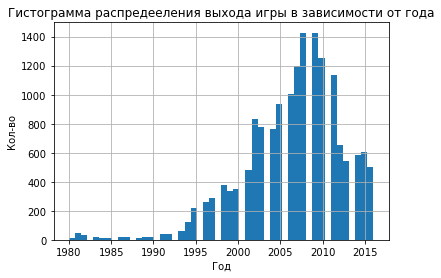

In [16]:
games['year_of_release'].hist(bins=50)
plt.title('Гистограмма распредееления выхода игры в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Кол-во')


По графику выхода игр видно что с 80 х до примерно 95 игр выходило не много порядка 200 в 95, пик приходится на 2008 и и потом спад. За все периоды данные не важны, важны с 95 и по 2015 года.

In [17]:
games_x= games.query('year_of_release>1995')

По гистограмме видно самы е популярные платформы это - 'PS2','DS','PSP','PS3','X360','PC','Wii', они находятся на верхушке по популярности покупок.

    Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

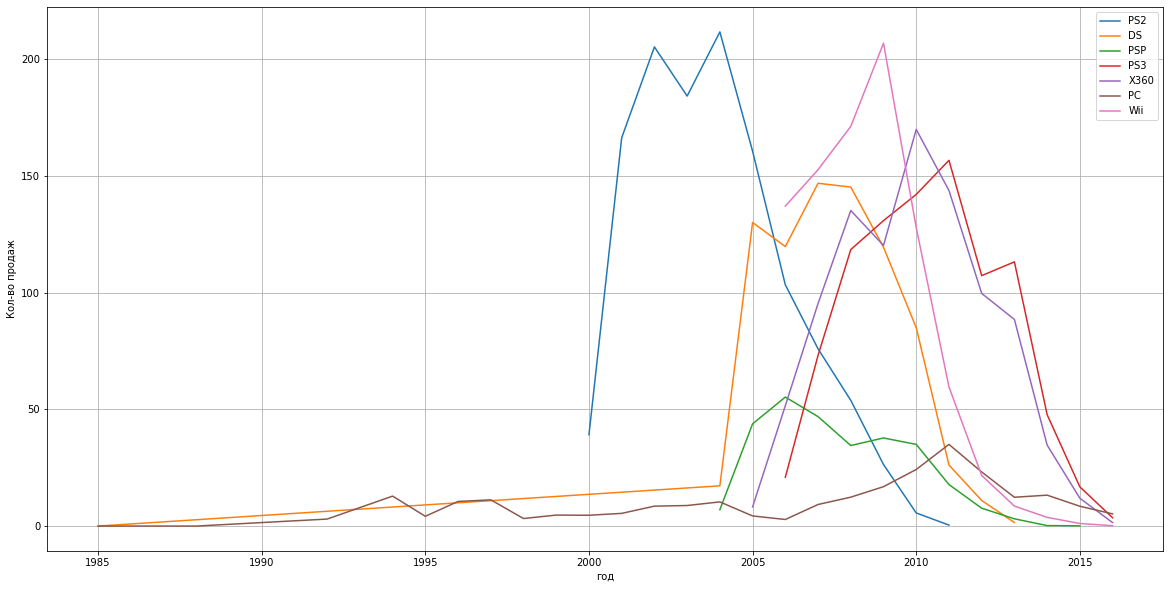

In [18]:
platform = ['PS2','DS','PSP','PS3','X360','PC','Wii']
for x in platform:
    games.query('platform == @x').groupby('year_of_release')['sum_region'].sum().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

In [19]:
DS =games[games['platform']=='DS']
DS['year_of_release'].value_counts()

2008.0    492
2009.0    403
2007.0    376
2010.0    323
2006.0    201
2011.0    153
2005.0    118
2004.0     23
2012.0     23
2013.0      8
1985.0      1
Name: year_of_release, dtype: int64

In [20]:
games = games.replace({'year_of_release':{1985:2004}})

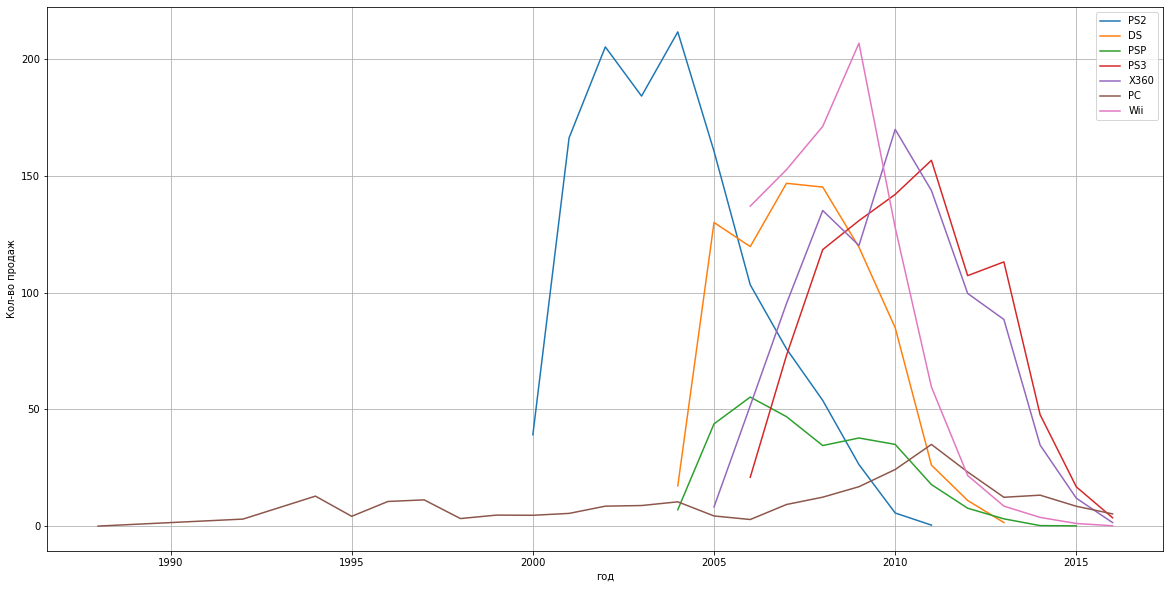

In [21]:
platform = ['PS2','DS','PSP','PS3','X360','PC','Wii']
for x in platform:
    games.query('platform == @x').groupby('year_of_release')['sum_region'].sum().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

За представленный период времени с 1985 года по 2016 - можно увидеть что в определенные моменты платформы DC и X360 появились первыми но популярности набрали только ближе к 2005 году(DC),X360 только к 2012, в 2000 году появилась PC и сразу набрала популярность  в теечнии 3-4 лет резкий рост затем 3 года спад и исчезала с продажи примерно в 2012 году, такие же графики примерно и устальных платформ с ростом популярности в теении 3-5 лет затем спад и дальше снова рост пропорциональны они затухающим колебаниям.  

    Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [22]:
temp1, temp2 = games.query('platform == @platform and 2010<=year_of_release<=2016'
           ).sum_region.sum(), games.query('2010<=year_of_release<=2016').sum_region.sum(),
temp1, temp2, round((temp2-temp1)/temp2*100,2) 

(1676.9700000000003, 2544.2400000000002, 34.09)

In [23]:
games_2017 = games.query('2012<=year_of_release<=2016')
games_2017.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region
0,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_ESRB,14.60
4,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
2882,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
2883,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
2884,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

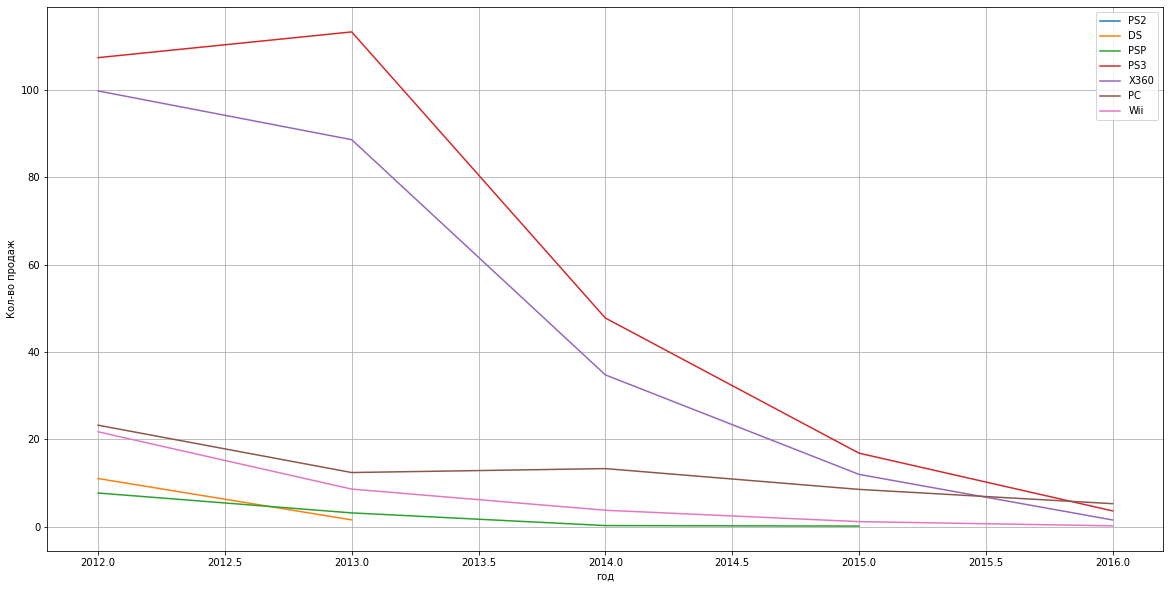

In [24]:
platform = ['PS2','DS','PSP','PS3','X360','PC','Wii']
for x in platform:
    games_2017.query('platform == @x').groupby('year_of_release')['sum_region'].sum().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

In [25]:
display(games_2017)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_ESRB,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [26]:
games_2017['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

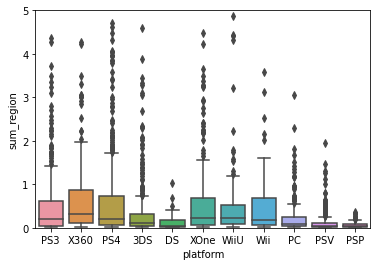

In [27]:
sns.boxplot(data = games_2017, y = 'sum_region', x='platform' )
plt.ylim(0, 5)
plt.show()

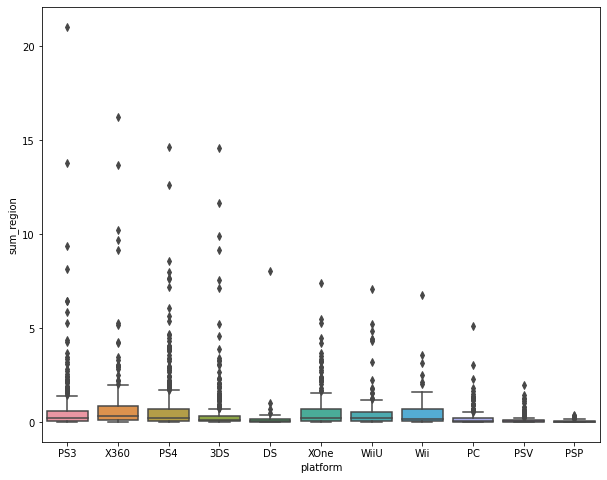

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = games_2017, y = 'sum_region', x='platform' )
plt.show()

    - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Самая популярная платформа мною выбранная PS3

    Вывод - оценки критиков от 0 до 2 не влияют на покупку приставок PS3, тогда как после 2 идетрост покупок PS3, далее идет пилообразные скачки  до положительных оценков до значения 8 и резкий рост покупаемости.- Оценки критиков от 10 до 70 не существенно влияют на покупку, но с 70 и до 90 вызываетр резкий рост продаж PS3

    Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

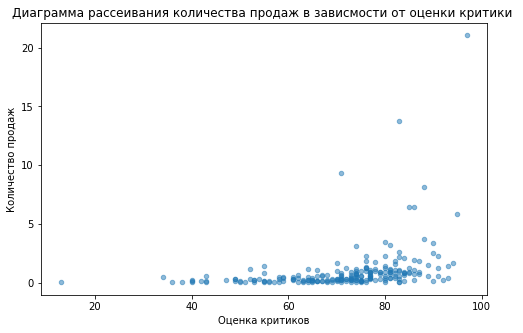

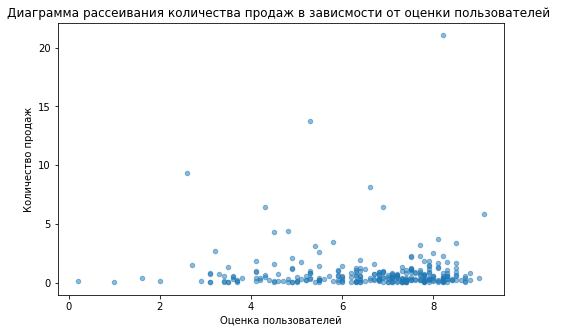

In [29]:
PS3 = games_2017.query('platform=="PS3"')
PS3.plot(kind='scatter', x='critic_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж в зависмости от оценки критики ')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

PS3.plot(kind='scatter', x='user_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж в зависмости от оценки пользователей ')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()


In [30]:
PS3['critic_score'].corr(PS3['sum_region'])


0.3314972592629587

In [31]:
PS3['user_score'].corr(PS3['sum_region'])

-0.005143522887113815

Диаграмма рассеивания как и график показывает что оценки критиков с 60 до 80-90 показывают рост продаж платформы  PS3 с кореляцией 0,4 что показывает не значительную прямую зависимость проадаж, тогда как оценки пользователей от 4 до 8-9 показывают рост продаж PS  и кореляция 0,16 которая дает показатель слабой зависмости оценки пользователей для продаж данной платформы.

    Соотнесите выводы с продажами игр на других платформах.

Сравнительный анализ кол-ва продаж плаформ X360 и PS3 в зависимости от оценки критиков

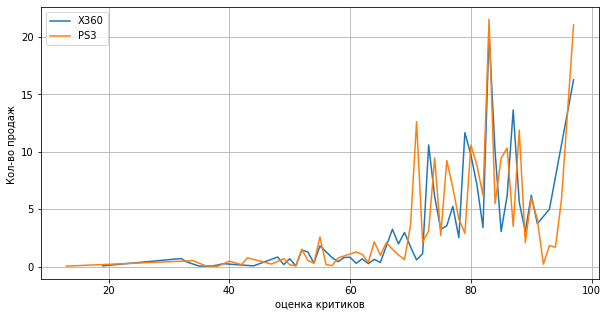

In [32]:
games_2017_X360=games_2017.query('platform=="X360"').groupby('critic_score')['sum_region'].sum().plot(label='X360', grid=True, xlabel='оценка критиков',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)
games_2017_PS3=games_2017.query('platform=="PS3"').groupby('critic_score')['sum_region'].sum().plot(label='PS3', grid=True, xlabel='оценка критиков',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)

Сравнительный анализ кол-ва продаж плаформ X360 и PS3 в зависимости от оценки пользователей

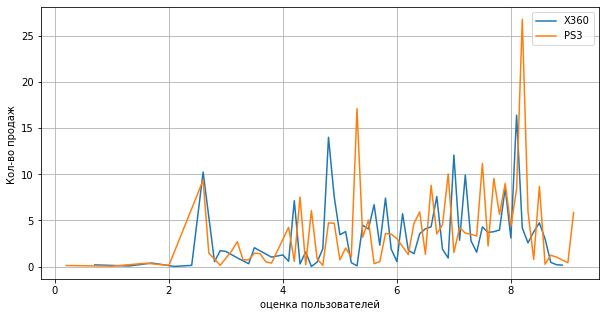

In [33]:
games_2017_X360=games_2017.query('platform=="X360"').groupby('user_score')['sum_region'].sum().plot(label='X360', grid=True, xlabel='оценка пользователей',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)
games_2017_PS3=games_2017.query('platform=="PS3"').groupby('user_score')['sum_region'].sum().plot(label='PS3', grid=True, xlabel='оценка пользователей',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)

Text(0, 0.5, 'Количество продаж')

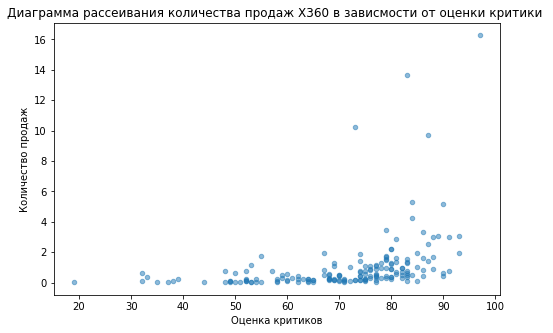

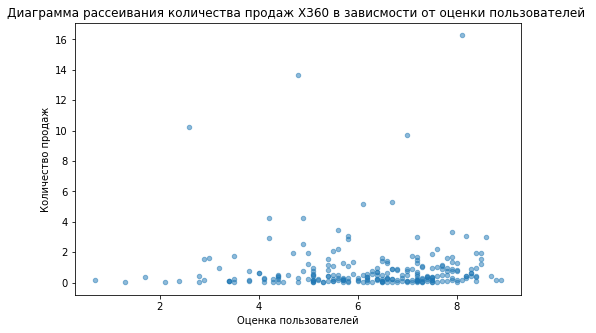

In [34]:
X360 = games_2017.query('platform=="X360"')
X360.plot(kind='scatter', x='critic_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж X360 в зависмости от оценки критики ')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')


X360.plot(kind='scatter', x='user_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж X360 в зависмости от оценки пользователей ')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')

In [35]:
X360['critic_score'].corr(X360['sum_region'])


0.3605734888507336

In [36]:
X360['user_score'].corr(X360['sum_region'])

0.006163978646213326

Сравнительный анализ кол-ва продаж плаформ DS и PS3 в зависимости от оценки критиков

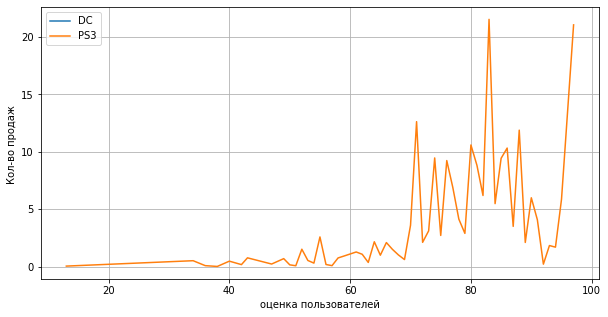

In [37]:
games_2017_DC=games_2017.query('platform=="DC"').groupby('critic_score')['sum_region'].sum().plot(label='DC', grid=True, xlabel='оценка критиков',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)
games_2017_PS3=games_2017.query('platform=="PS3"').groupby('critic_score')['sum_region'].sum().plot(label='PS3', grid=True, xlabel='оценка пользователей',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)

Сравнительный анализ кол-ва продаж плаформ PC и PS3 в зависимости от оценки пользователей

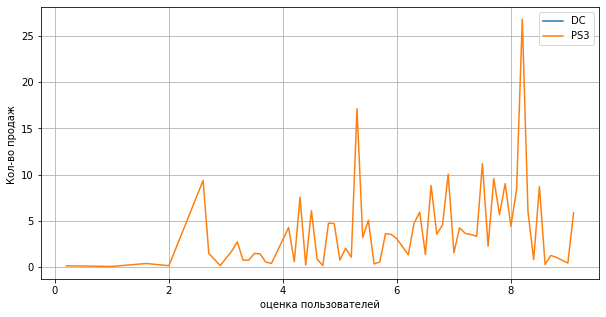

In [38]:
games_2017_DC=games_2017.query('platform=="DC"').groupby('user_score')['sum_region'].sum().plot(label='DC', grid=True, xlabel='оценка пользователей',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)
games_2017_PS3=games_2017.query('platform=="PS3"').groupby('user_score')['sum_region'].sum().plot(label='PS3', grid=True, xlabel='оценка пользователей',
                                                                                   ylabel='Кол-во продаж ',
                                                                                     figsize=(10,5),
                                                                                     legend=True)

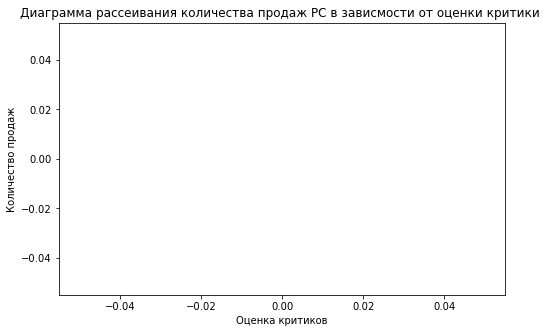

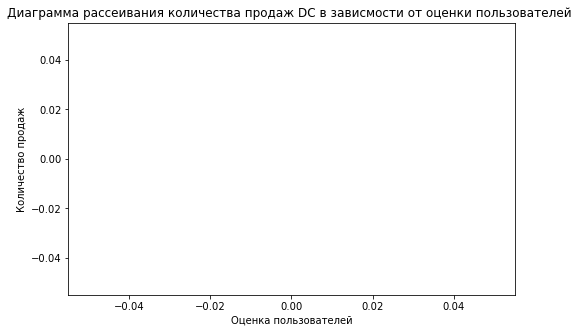

In [39]:
DC = games_2017.query('platform=="DC"')
DC.plot(kind='scatter', x='critic_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж PC в зависмости от оценки критики ')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

DC.plot(kind='scatter', x='user_score', y='sum_region', alpha=0.5,figsize=(8,5) )
plt.title('Диаграмма рассеивания количества продаж DC в зависмости от оценки пользователей ')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [40]:
DS['critic_score'].corr(DS['sum_region'])

0.23754579854113467

In [41]:
DS['user_score'].corr(DS['sum_region'])

0.130876009758442

    Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
games_2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_ESRB,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


In [43]:
games_2017['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

3 Популярных жанра игр и их популярность в годовой шкале.

Сумарные значения продаж 3-х популярных игр

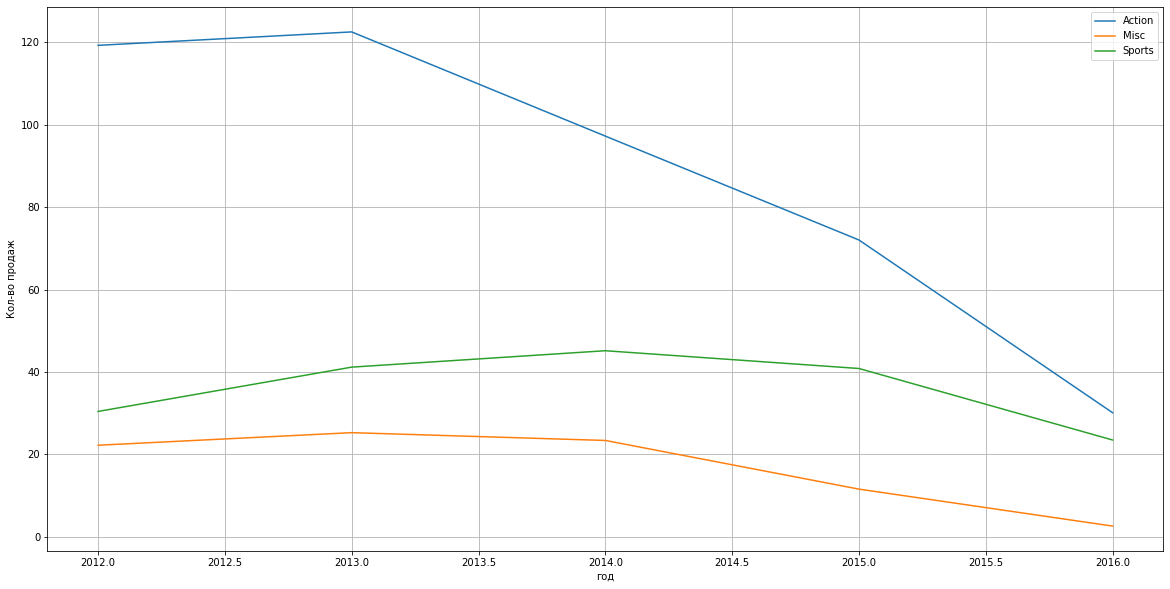

In [44]:
genre_popular = ['Action','Misc','Sports']
for x in genre_popular:
    games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].sum().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)



Медианные значения продаж 3-х популярных игр

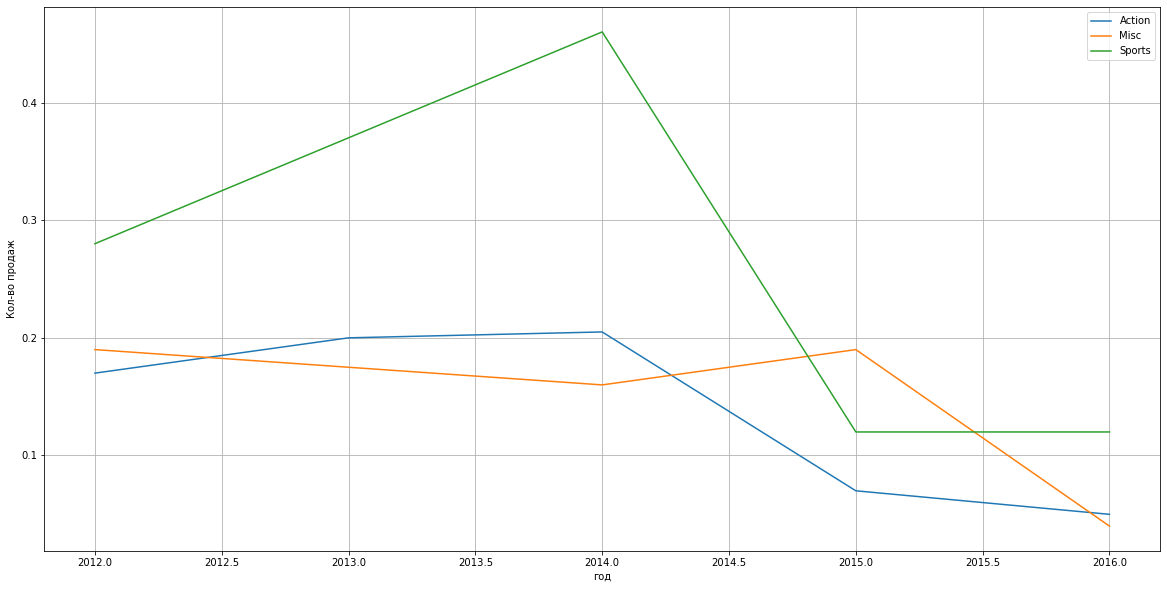

In [45]:
genre_popular = ['Action','Misc','Sports']
for x in genre_popular:
    games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].median().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)


Диаграмма размаха 3-х популярных игр

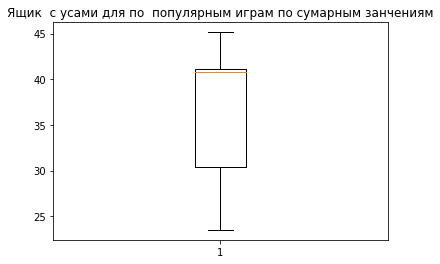

In [46]:
genre_popular = ['Action','Misc','Sports']
for x in genre_popular:
    games_poular=games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].sum()
plt.boxplot(games_poular)
plt.title('Ящик  с усами для по  популярным играм по сумарным занчениям')
plt.show()

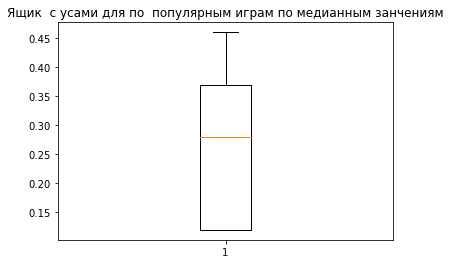

In [47]:
genre_popular = ['Action','Misc','Sports']
for x in genre_popular:
    games_poular=games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].median()
plt.boxplot(games_poular)
plt.title('Ящик  с усами для по  популярным играм по медианным занчениям')
plt.show()

3 менее популярных жанра игр (закрывающих список популярности) и их популярность в годовой шкале.

Сумарные значения продаж по замыкающей популярности игр

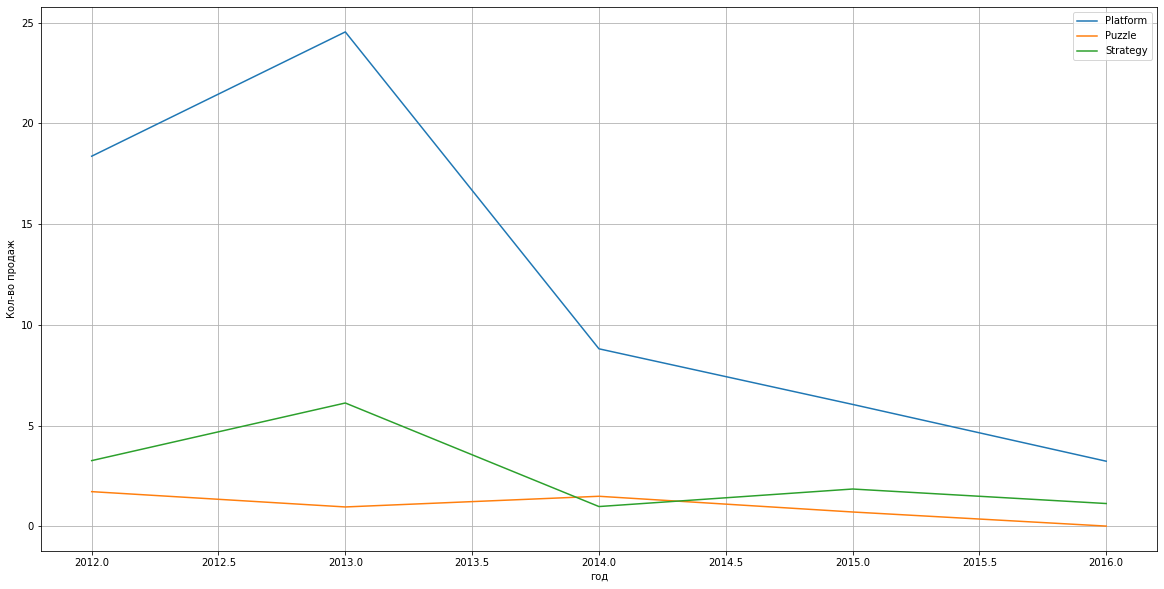

In [48]:
genre_non_popular = ['Platform','Puzzle','Strategy'] 
for x in genre_non_popular:
    games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].sum().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Медианные значения продаж по замыкающей популярности игр

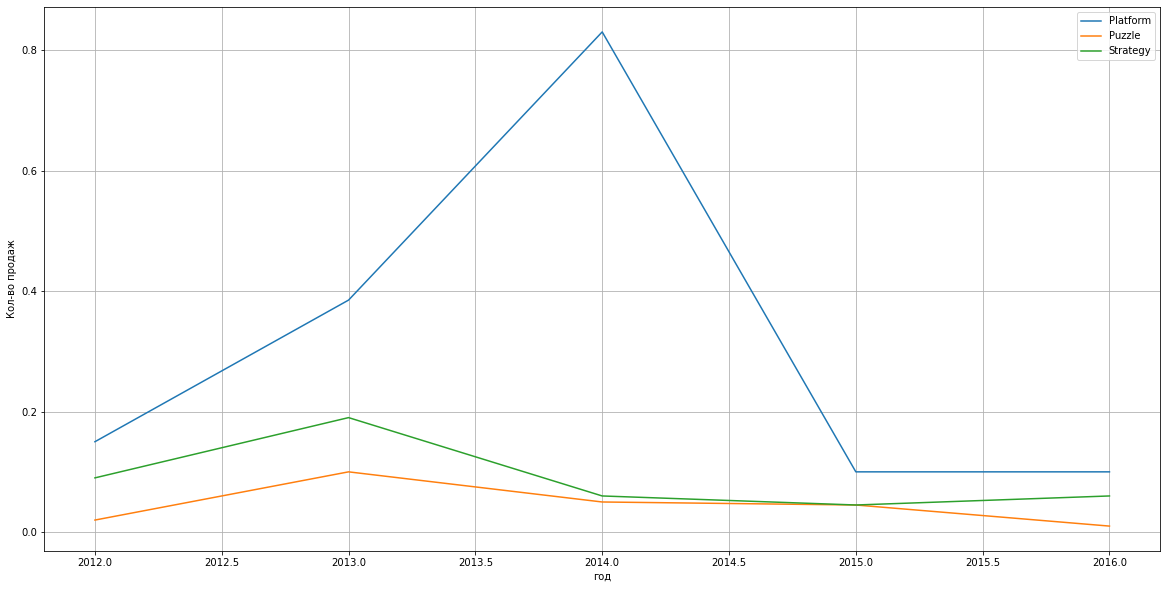

In [49]:
genre_non_popular = ['Platform','Puzzle','Strategy'] 
for x in genre_non_popular:
    games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].median().plot(label=x, grid=True, xlabel='год',
                                                                                   ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

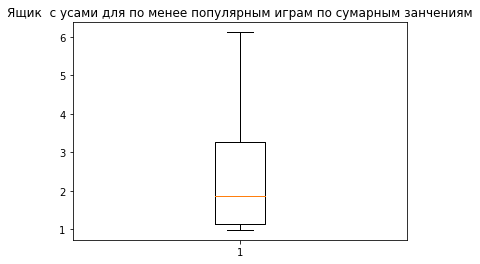

In [50]:
genre_non_popular = ['Platform','Puzzle','Strategy'] 
for x in genre_non_popular:
    games_non=games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].sum()
plt.boxplot(games_non)
plt.title('Ящик  с усами для по менее популярным играм по сумарным занчениям')
plt.show()

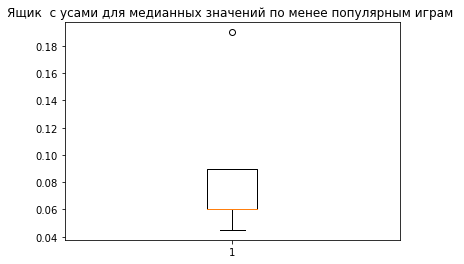

In [51]:
genre_non_popular = ['Platform','Puzzle','Strategy'] 
for x in genre_non_popular:
    games_non=games_2017.query('genre == @x').groupby('year_of_release')['sum_region'].median()
plt.boxplot(games_non)
plt.title('Ящик  с усами для медианных значений по менее популярным играм ')
plt.show()

Вывод - 3 ка популярных игр за 2012 - 1026 год игры Спорт и Экшн выдают более менее стабильные продажи, есть незначительное снижение но прибыль идет стабильно, это видно по медианным значениям с 2015 по 2016 год, а Misc постепенно теряет популярность и продажи с 2015 года резко упали хотя были выше выше перечисленных игр, что касается тройки замыкания  Platform','Puzzle','Strategy - 2015-2016 все три игры приносят стабильный доход и нет перепадов, Platform в 2014 году была на пике продаж и после пошло снижение спроса, 'Puzzle','Strategy - имели в 2013 году свои наивышие показатели и потеряяли несколько позиций но примерный спрос осталься. 

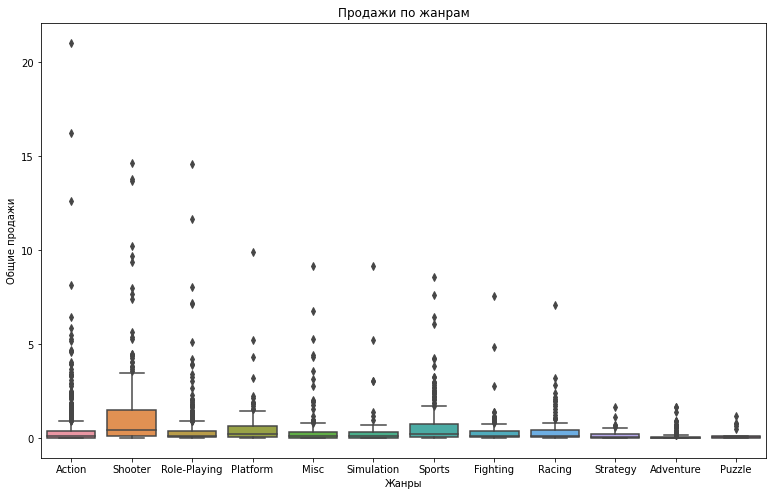

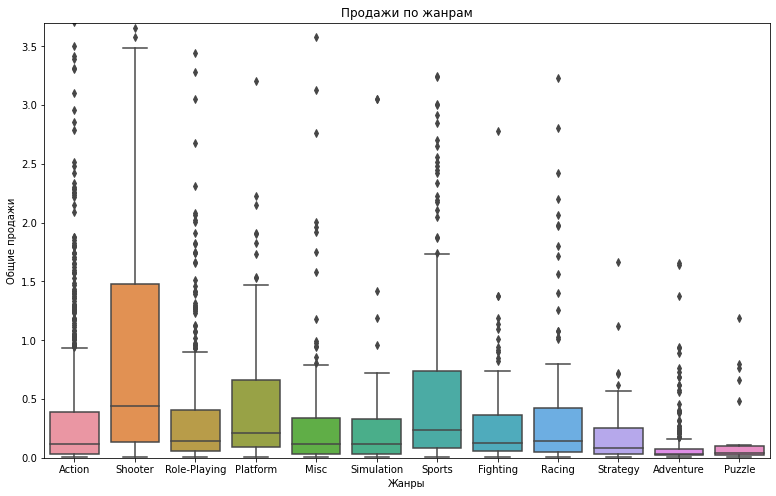

In [52]:
data_temp, y = games_2017, 'sum_region'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.7)))
plt.show()

<AxesSubplot:xlabel='Игра', ylabel='Кол-во продаж медиана'>

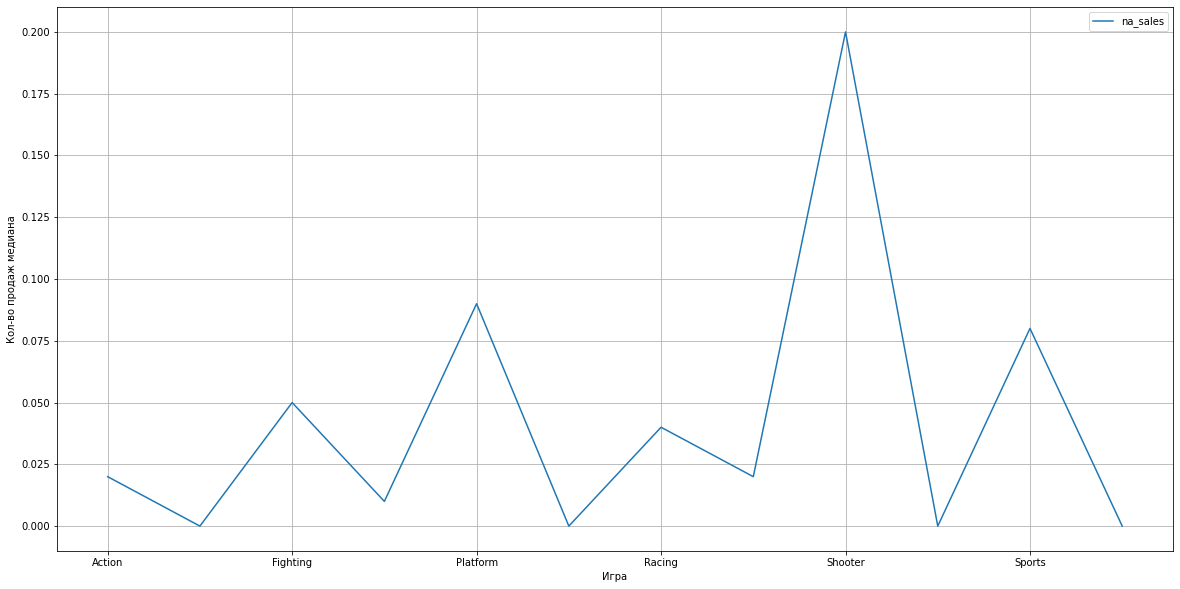

In [53]:
games_2017.groupby('genre')['na_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж медиана',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Text(0.5, 1.0, 'Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Северной Америки')

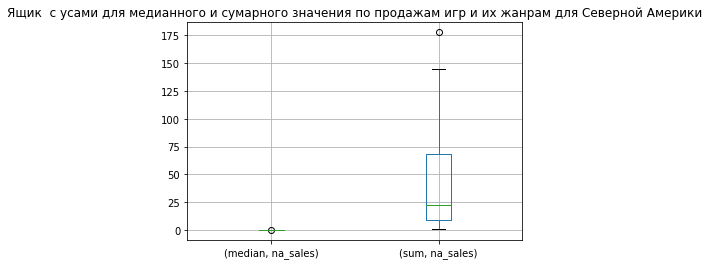

In [54]:
na_sales = games_2017.pivot_table(index='genre', values='na_sales', aggfunc=['median', 'sum'])
na_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Северной Америки')



Text(0.5, 1.0, 'Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Японии')

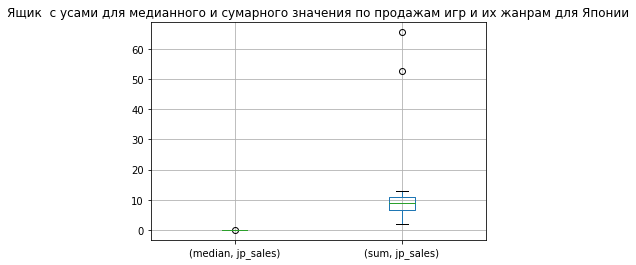

In [55]:
jp_sales = games_2017.pivot_table(index='genre', values='jp_sales', aggfunc=['median', 'sum'])
jp_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Японии')



Text(0.5, 1.0, 'Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Европы')

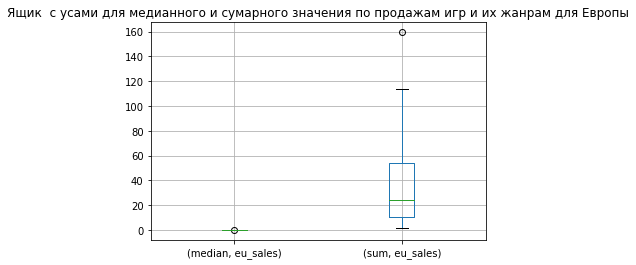

In [56]:
eu_sales = games_2017.pivot_table(index='genre', values='eu_sales', aggfunc=['median', 'sum'])
eu_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Европы')

    Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [57]:
games_2017.groupby('platform')['na_sales'].sum()

platform
3DS      55.31
DS        4.59
PC       19.12
PS3     103.38
PS4     108.74
PSP       0.13
PSV      10.98
Wii      17.45
WiiU     38.10
X360    140.05
XOne     93.12
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='приставка', ylabel='Кол-во продаж'>

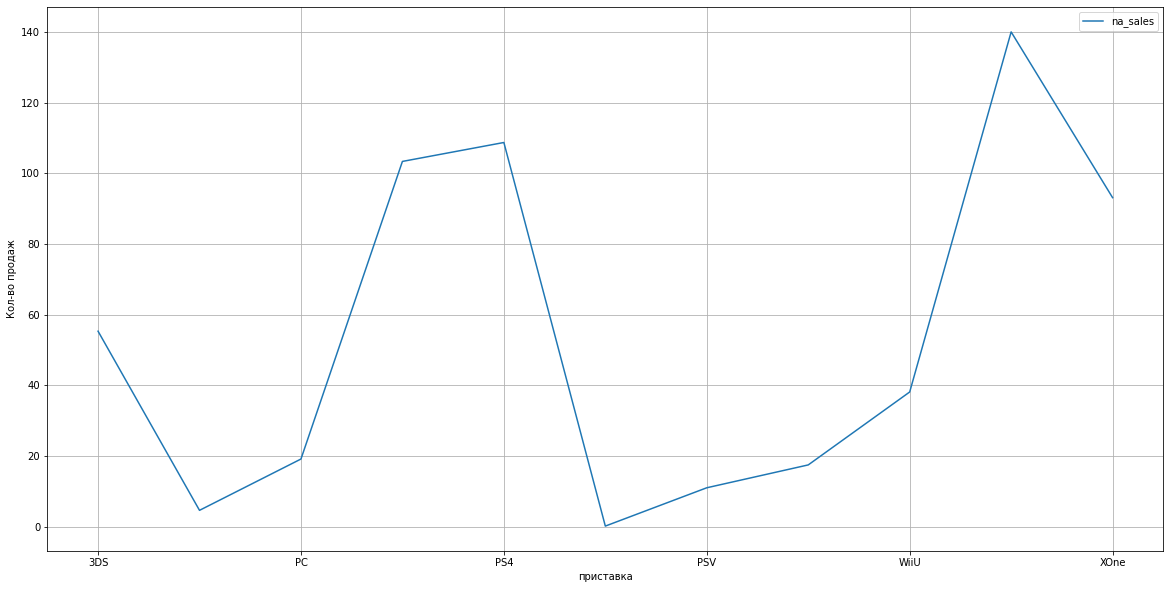

In [58]:
games_2017.groupby('platform')['na_sales'].sum().plot(grid=True, xlabel='приставка',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

In [59]:
games_2017.groupby('platform')['eu_sales'].sum()


platform
3DS      42.64
DS        3.53
PC       37.76
PS3     106.86
PS4     141.09
PSP       0.42
PSV      11.36
Wii      11.92
WiiU     25.13
X360     74.52
XOne     51.59
Name: eu_sales, dtype: float64

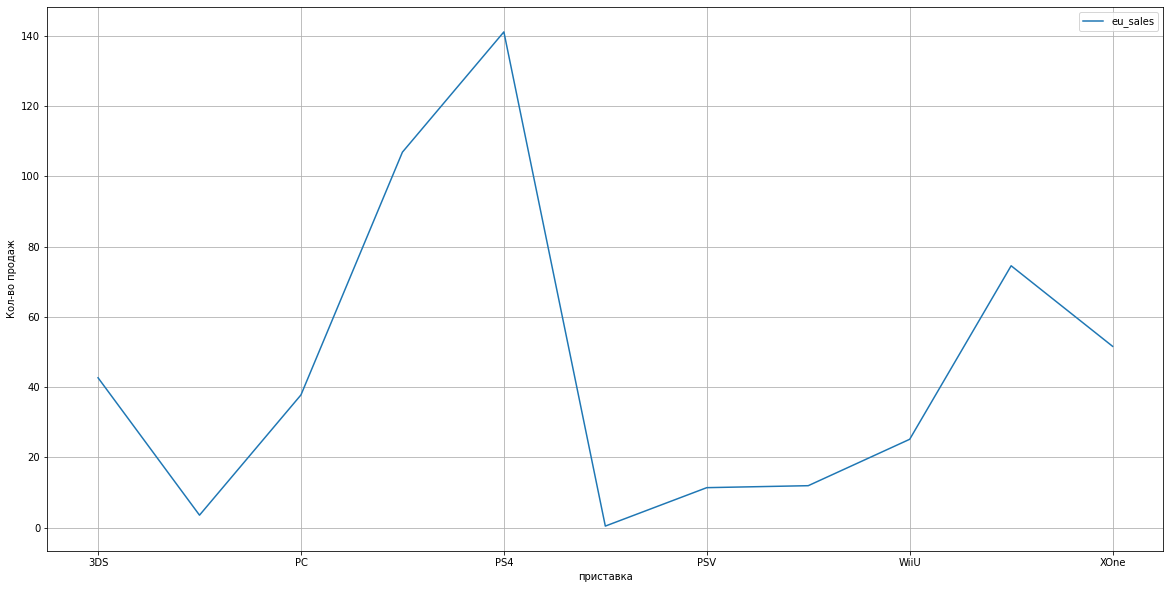

In [60]:
games_2017.groupby('platform')['eu_sales'].sum().plot(grid=True, xlabel='приставка',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

In [61]:
games_2017.groupby('platform')['jp_sales'].sum()


platform
3DS     87.79
DS       3.72
PC       0.00
PS3     35.29
PS4     15.96
PSP     10.47
PSV     21.04
Wii      3.39
WiiU    13.01
X360     1.57
XOne     0.34
Name: jp_sales, dtype: float64

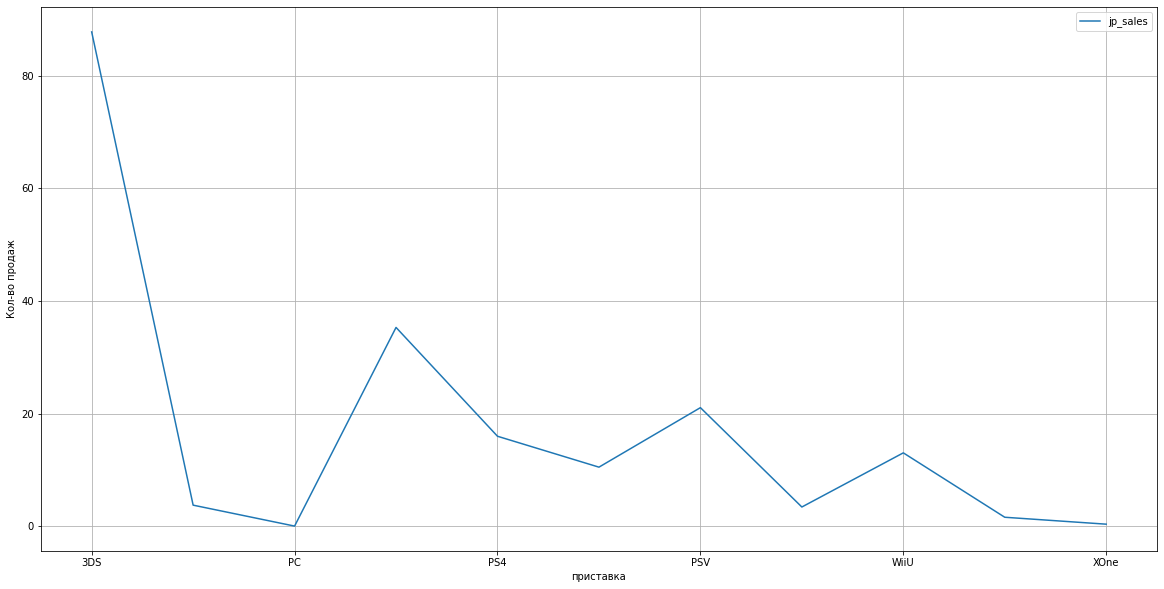

In [62]:
games_2017.groupby('platform')['jp_sales'].sum().plot(grid=True, xlabel='приставка',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

In [63]:
games_2017.groupby('platform')['other_sales'].sum()

platform
3DS      8.87
DS       0.71
PC       5.77
PS3     43.26
PS4     48.35
PSP      0.17
PSV      5.80
Wii      2.61
WiiU     5.95
X360    20.40
XOne    14.27
Name: other_sales, dtype: float64

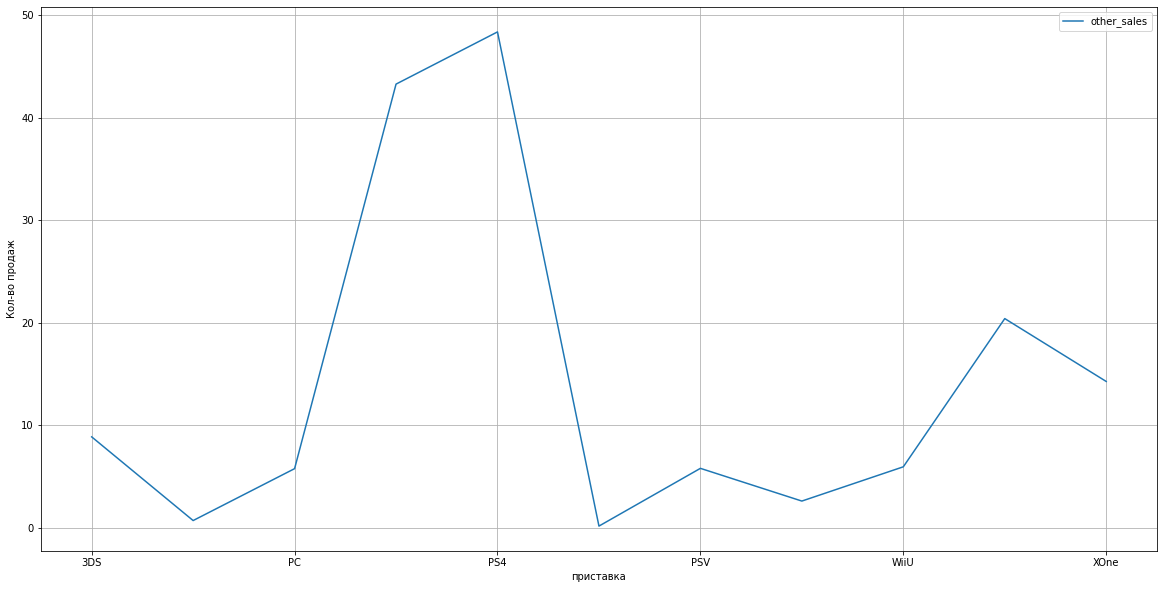

In [64]:
games_2017.groupby('platform')['other_sales'].sum().plot(grid=True, xlabel='приставка',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

Из графиков видно не зависимо от региона продаж самой популярной платформой что в  в Японии или Европе и также в других регионах является PS3, следом идет Х360 - в Европе, Северной Америке и прочих регионах, в Северной Америке самая популярная платформа оказалась Х360, и 3 место занимает Wii чуть опередив в  регионах Северной Америке, Японии и Европе и  других регионов.

Самые популярные жанры (топ-5). Поясните разницу.

In [65]:
na = games_2017.groupby('genre')['na_sales'].sum().sort_values()
eu = games_2017.groupby('genre')['eu_sales'].sum().sort_values()
jp = games_2017.groupby('genre')['jp_sales'].sum().sort_values()
oth = games_2017.groupby('genre')['other_sales'].sum().sort_values()

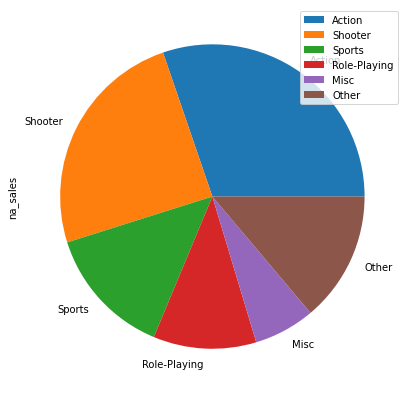

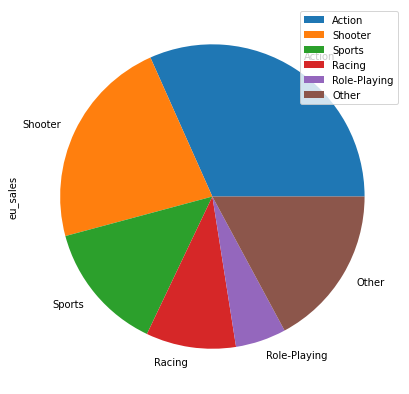

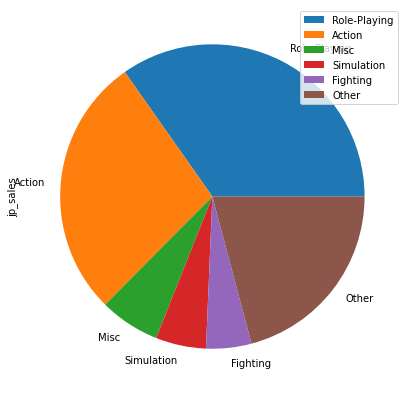

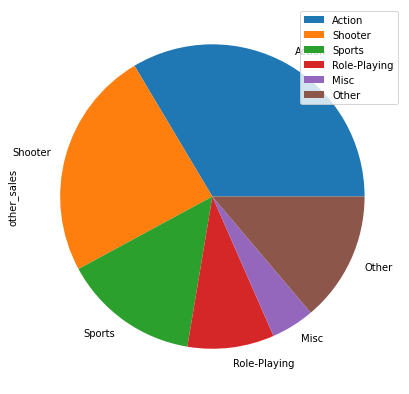

In [66]:

na = pd.DataFrame({'na_sales': [177, 144 , 81,64,38,81]},
                  index=['Action', 'Shooter','Sports', 'Role-Playing', 'Misc','Other'])
plot = na.plot.pie(y='na_sales', figsize=(7, 7))

eu = pd.DataFrame({'eu_sales': [159, 113 , 69,48,27,86]},
                  index=['Action','Shooter', 'Sports', 'Racing','Role-Playing', 'Other'])
plot = eu.plot.pie(y='eu_sales', figsize=(7, 7))

jp = pd.DataFrame({'jp_sales': [65, 52 , 12,10,9,39]},
                  index=['Role-Playing','Action', 'Misc', 'Simulation','Fighting', 'Other'])
plot = jp.plot.pie(y='jp_sales', figsize=(7, 7))

oth = pd.DataFrame({'other_sales': [51, 37 , 22,14,7,21]},
                  index=['Action','Shooter', 'Sports',  'Role-Playing','Misc','Other'])
plot = oth.plot.pie(y='other_sales', figsize=(7, 7))

Сумарные продажи в зависимости от жанра игры в Северной Америке

<AxesSubplot:xlabel='Игра', ylabel='Кол-во продаж медиана'>

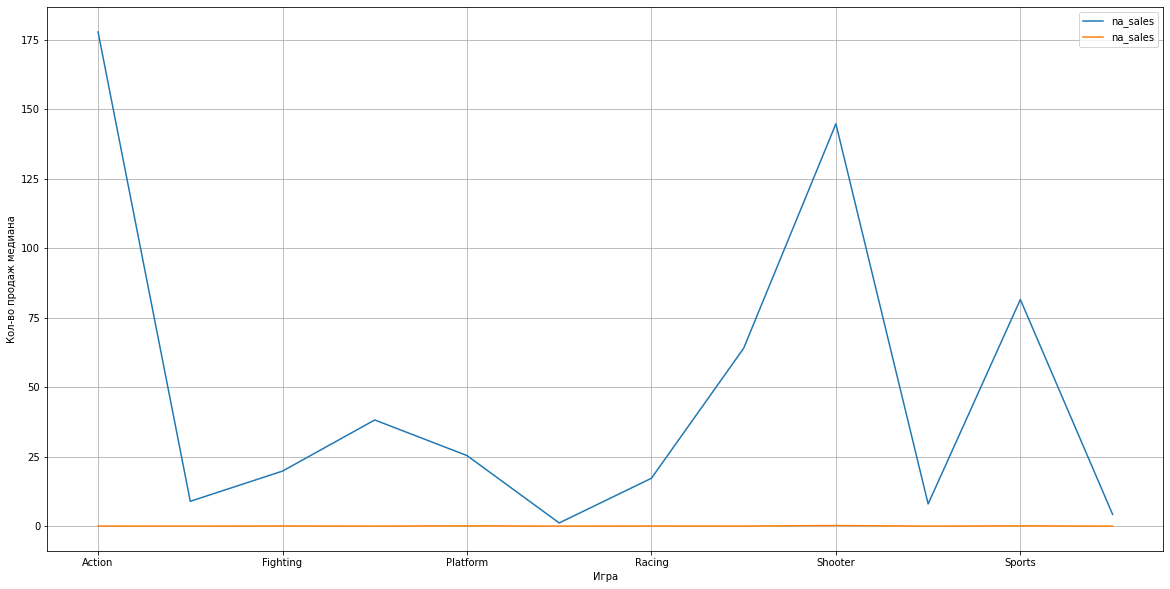

In [67]:
games_2017.groupby('genre')['na_sales'].sum().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж сумма',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
games_2017.groupby('genre')['na_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж медиана',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Медианные продажи в зависимости от жанра игры в Северной Америке

<AxesSubplot:xlabel='Игра', ylabel='Кол-во продаж медиана'>

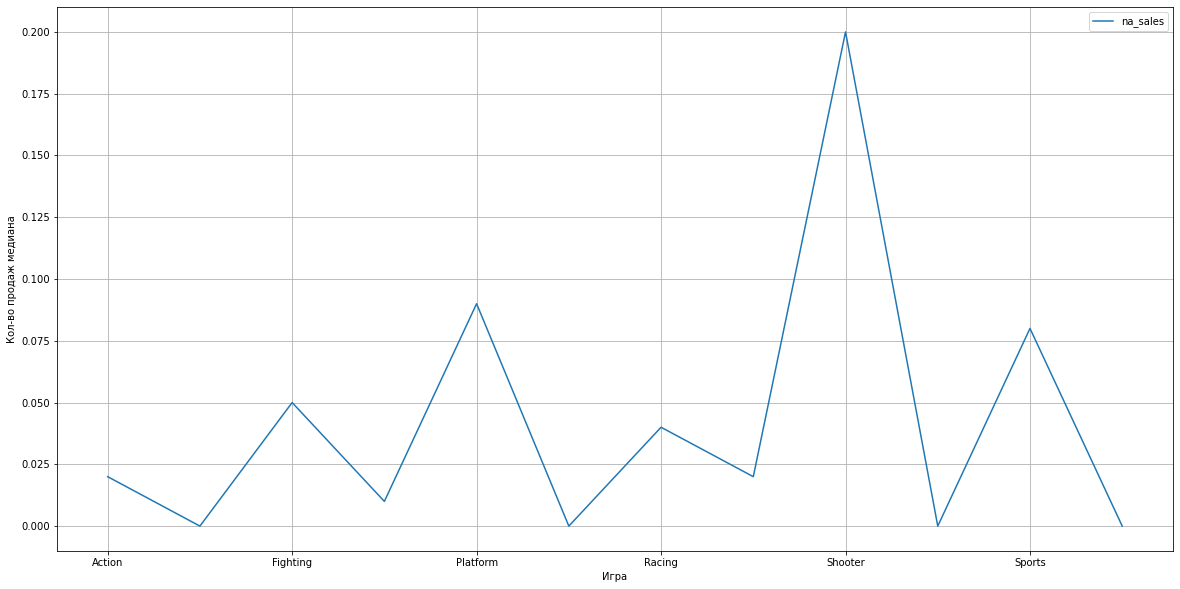

In [68]:
games_2017.groupby('genre')['na_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж медиана',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Диаграмма размаха другие регионы по жанрам и продажам Северной Америки

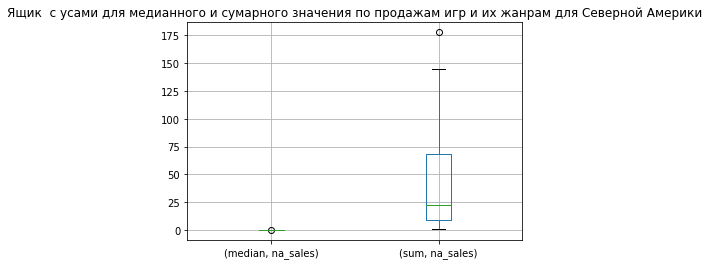

In [69]:
na_sales = games_2017.pivot_table(index='genre', values='na_sales', aggfunc=['median', 'sum'])
na_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Северной Америки')
plt.show()

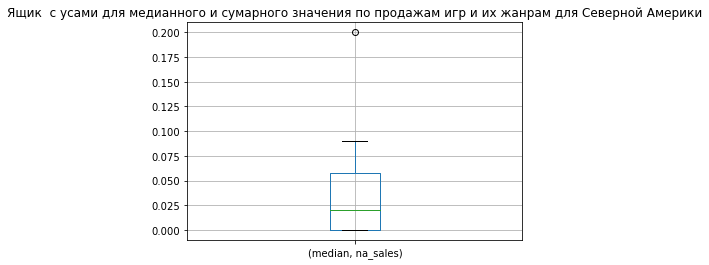

In [70]:
na_sales = games_2017.pivot_table(index='genre', values='na_sales', aggfunc=['median'])
na_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Северной Америки')
plt.show()

Сумарные продажи в зависимости от жанра игры в Европе

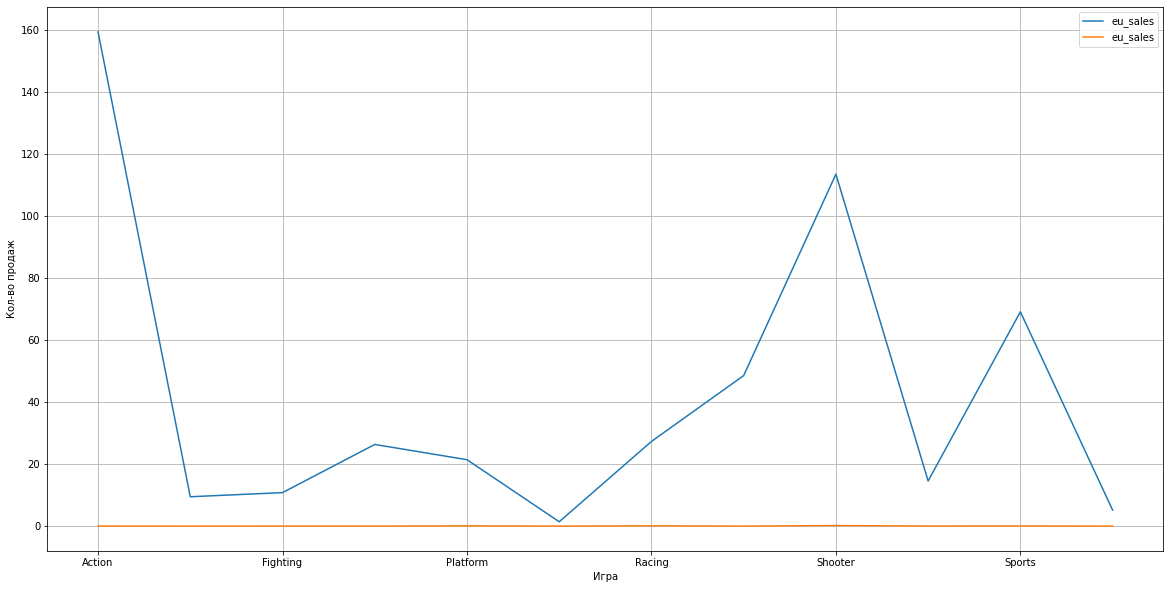

In [71]:
games_2017.groupby('genre')['eu_sales'].sum().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
games_2017.groupby('genre')['eu_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

Медианные значения продажи в зависимости от жанра игры в Европе

<AxesSubplot:xlabel='Игра', ylabel='Кол-во продаж'>

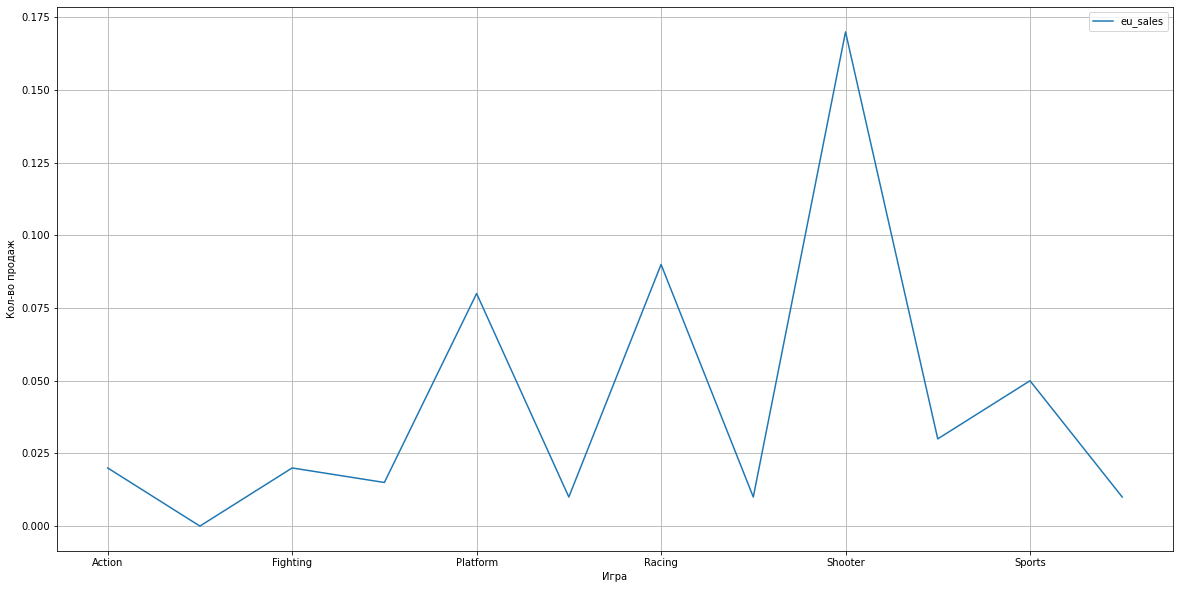

In [72]:
games_2017.groupby('genre')['eu_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Диаграмма размаха другие регионы по жанрам и продажам Европы

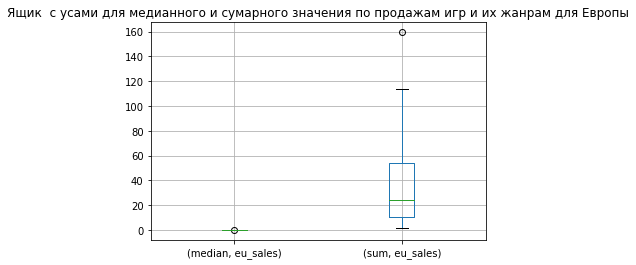

In [73]:
eu_sales = games_2017.pivot_table(index='genre', values='eu_sales', aggfunc=['median', 'sum'])
eu_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Европы')
plt.show()

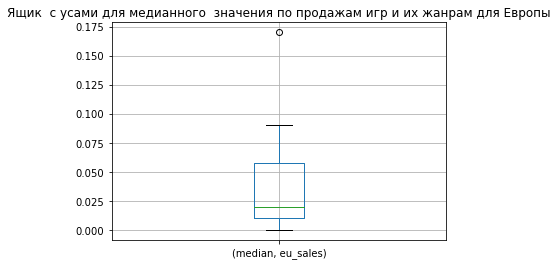

In [74]:
eu_sales = games_2017.pivot_table(index='genre', values='eu_sales', aggfunc=['median'])
eu_sales.boxplot()
plt.title('Ящик  с усами для медианного  значения по продажам игр и их жанрам для Европы')
plt.show()

In [75]:
games_2017.groupby('genre')['jp_sales'].sum().sort_values()


genre
Puzzle           2.14
Racing           2.50
Strategy         2.88
Sports           8.01
Adventure        8.24
Platform         8.63
Shooter          9.23
Fighting         9.44
Simulation      10.41
Misc            12.86
Action          52.80
Role-Playing    65.44
Name: jp_sales, dtype: float64

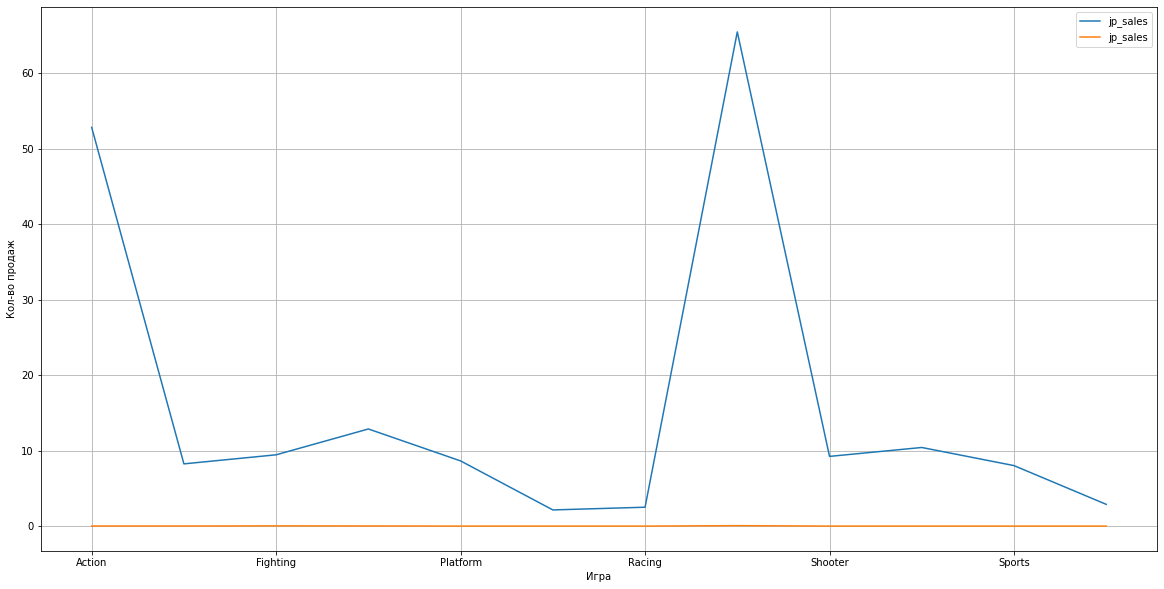

In [76]:
games_2017.groupby('genre')['jp_sales'].sum().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
games_2017.groupby('genre')['jp_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

<AxesSubplot:xlabel='Игра', ylabel='Кол-во продаж'>

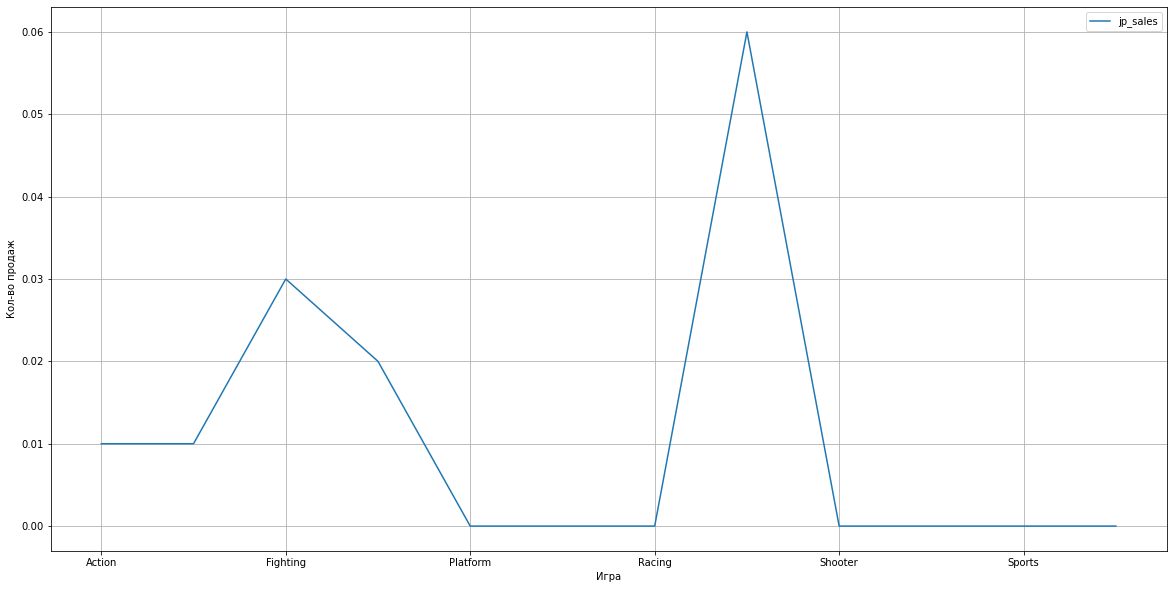

In [77]:
games_2017.groupby('genre')['jp_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

Диаграмма размаха другие регионы по жанрам и продажам Японии

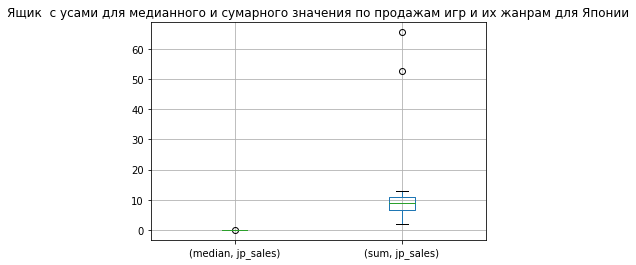

In [78]:
jp_sales = games_2017.pivot_table(index='genre', values='jp_sales', aggfunc=['median', 'sum'])
jp_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для Японии')
plt.show()

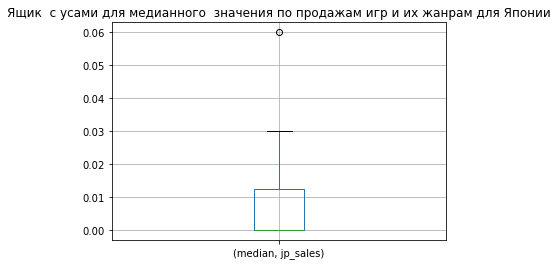

In [79]:
jp_sales = games_2017.pivot_table(index='genre', values='jp_sales', aggfunc=['median'])
jp_sales.boxplot()
plt.title('Ящик  с усами для медианного  значения по продажам игр и их жанрам для Японии')
plt.show()

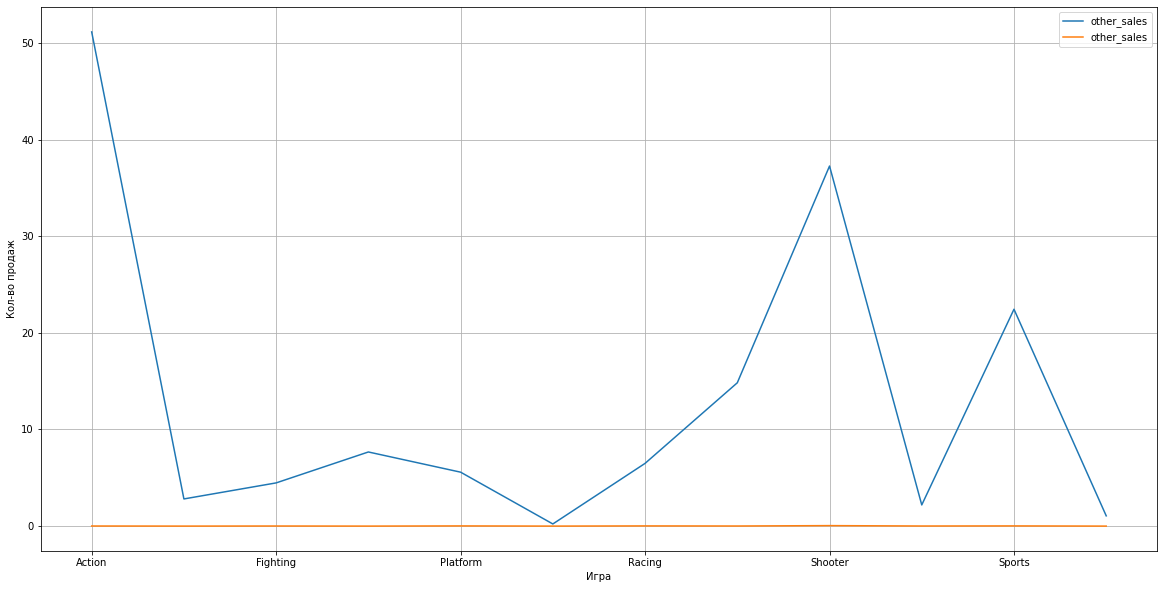

In [80]:
games_2017.groupby('genre')['other_sales'].sum().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
games_2017.groupby('genre')['other_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

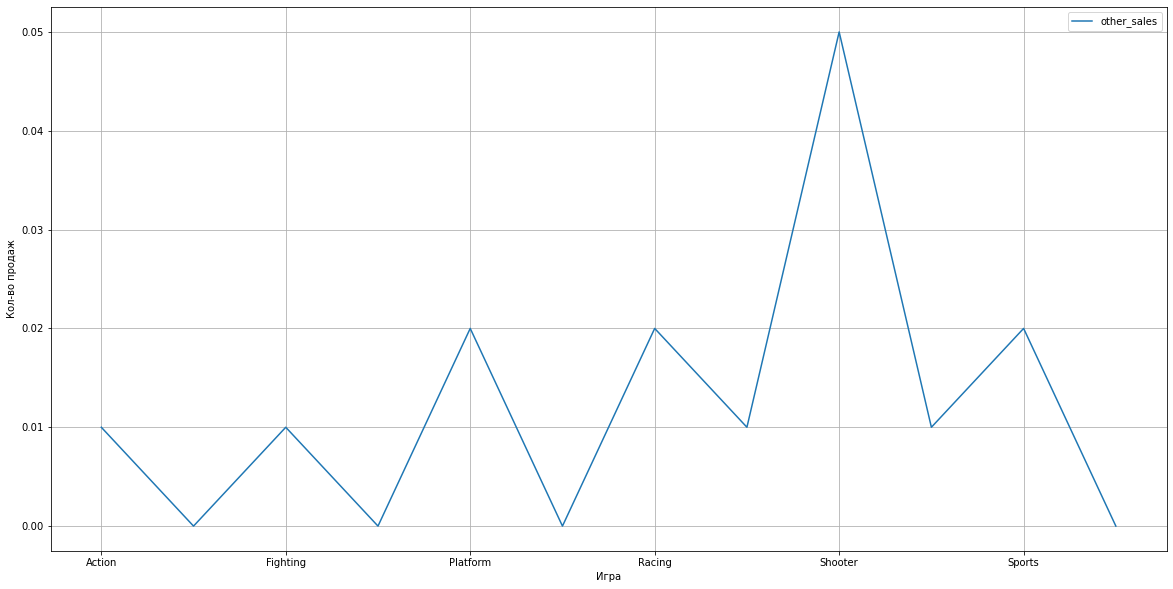

In [81]:
games_2017.groupby('genre')['other_sales'].median().plot(grid=True, xlabel='Игра',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

Диаграмма размаха другие регионы

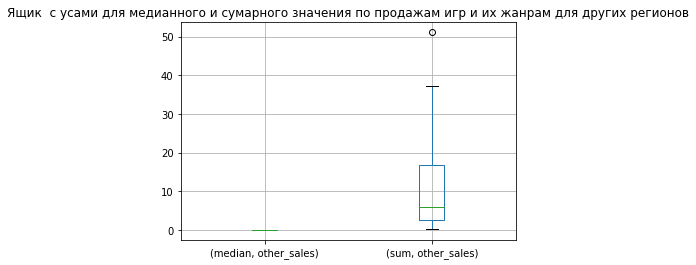

In [82]:
other_sales = games_2017.pivot_table(index='genre', values='other_sales', aggfunc=['median', 'sum'])
other_sales.boxplot()
plt.title('Ящик  с усами для медианного и сумарного значения по продажам игр и их жанрам для других регионов')
plt.show()

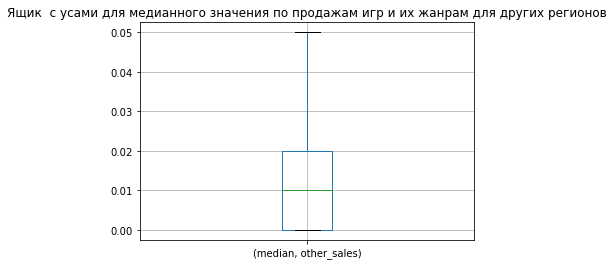

In [83]:
other_sales = games_2017.pivot_table(index='genre', values='other_sales', aggfunc=['median'])
other_sales.boxplot()
plt.title('Ящик  с усами для медианного значения по продажам игр и их жанрам для других регионов')
plt.show()

Разница в том что в каждой части света свои предпочтения - в Японии самые популярные игры Role-Playing,Action,Misc,Sports,Adventure c покупательной активностью с 35  милионов штук до 10 , в Европе топ 5 популярных игр Action-154.58 мил. шт.,Shooter-110.92, Sports-77.61,Misc-53.70,Racing-34.39, в Северной Америке - Action-203.40, Shooter         163.51,Sports-117.13,Misc-107.02, Role-Playing-69.61,  в других регионах - Action-52.11,Shooter-36.22,Sports-26.83,Misc-16.75, дполнительно построил для стравнения медианные значения продаж игр в зависимости от региона и жанра игры, и графики медианных значений показывают низкие показатели которые не стоит расматривать.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [84]:
games_2017['rating'].value_counts()

no_ESRB    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

<AxesSubplot:xlabel='Рейтинг', ylabel='Кол-во продаж'>

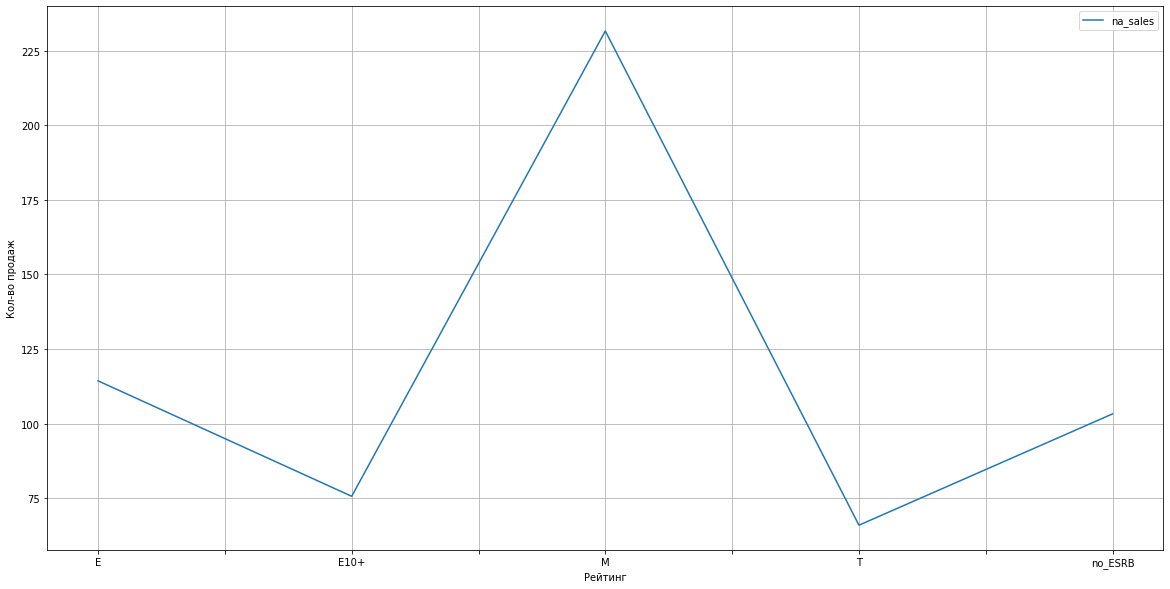

In [85]:
games_2017.groupby('rating')['na_sales'].sum().plot(grid=True, xlabel='Рейтинг',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)

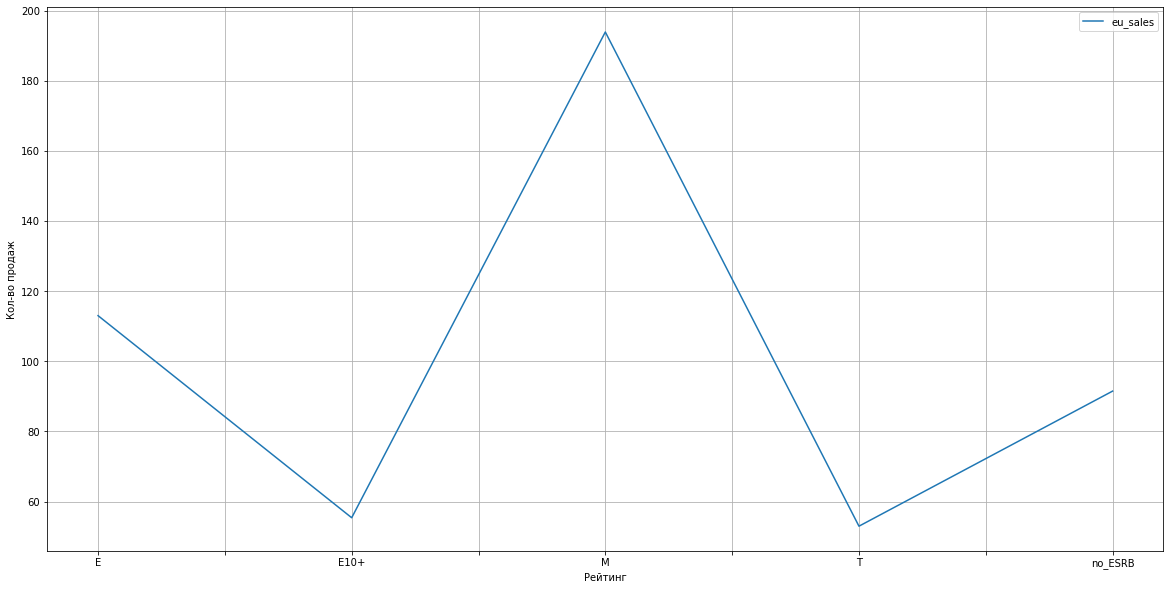

In [86]:
games_2017.groupby('rating')['eu_sales'].sum().plot(grid=True, xlabel='Рейтинг',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

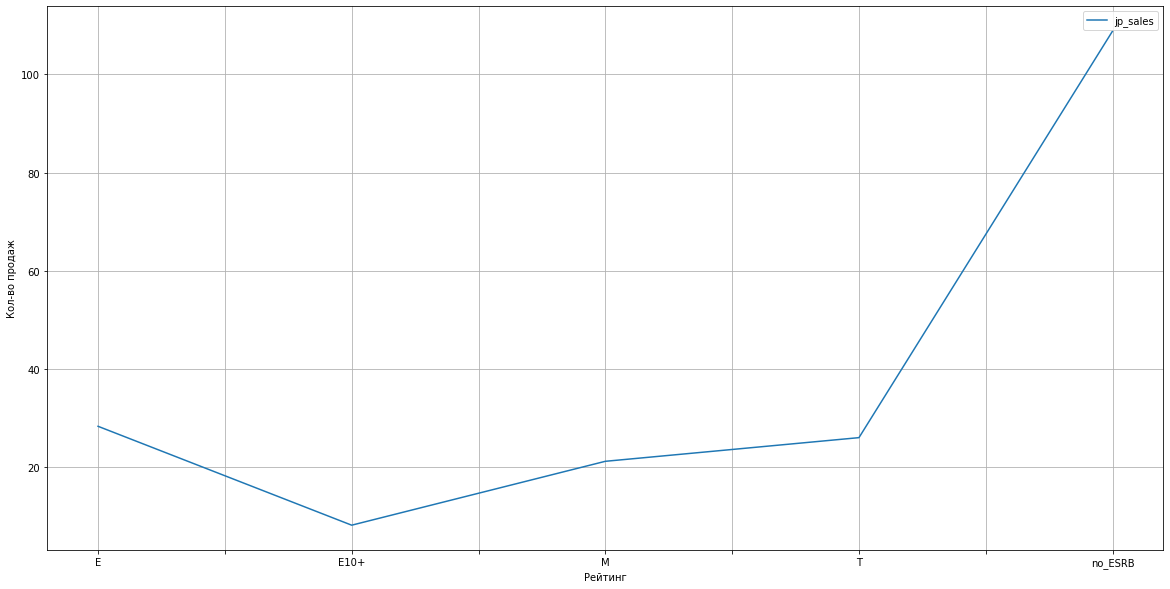

In [87]:
games_2017.groupby('rating')['jp_sales'].sum().plot(grid=True, xlabel='Рейтинг',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

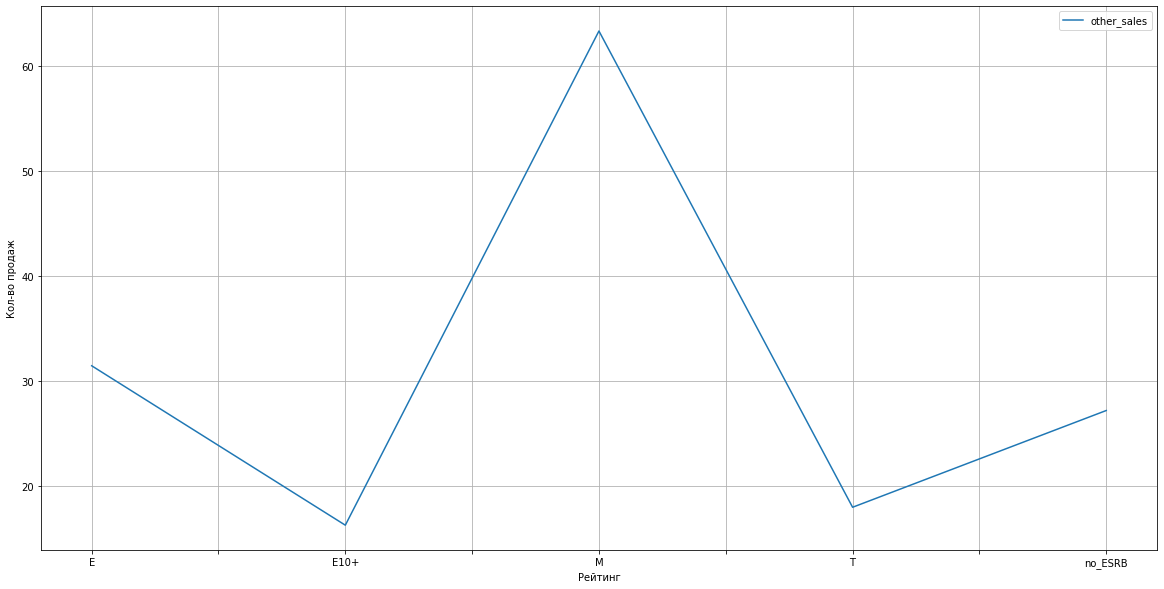

In [88]:
games_2017.groupby('rating')['other_sales'].sum().plot(grid=True, xlabel='Рейтинг',ylabel='Кол-во продаж',
                                                                                     figsize=(20,10),
                                                                                     legend=True)
plt.show()

Вывод - Северная Америка - самые популярные рейтинги по играм занимают М, E и noESRB.
Европа - таже популярность и в Европе, М, E и noESRB с разницей лишь в незначительном количестве.
Япония - noESRB решено что этот рейтинг для Америки и Европы, здесь рейтинг Т, Е и М
для остальных регионов - популярны М, Е и Т если не учитывать noESRB.

In [89]:
temp = games_2017.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_ESRB    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

Шаг 5. Проверьте гипотезы

Нулевая гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза рейтинги различны

Нулевая гипотеза строилась на том что по ппулярности можно допустить что рейтинги у этих платформ одинаковые а как в действительности покажет проверка.

In [90]:

Xbox = games_2017[games_2017['platform']=="X360"]['user_score'].dropna()
PC = games_2017[games_2017['platform']=="PC"]['user_score'].dropna()

In [91]:
alpha=0.05

In [92]:
results = st.ttest_ind(Xbox, PC)

In [93]:
print('p-значение:', results.pvalue)

p-значение: 0.17951812027167968


In [94]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний рейтинг Xbox и PC отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

Не можем отвергнуть нулевую гипотезу.


In [95]:
Xbox1 = games_2017[games_2017['platform']=="X360"]['user_score'].mean()
PC1 = games_2017[games_2017['platform']=="PC"]['user_score'].mean()
display(Xbox1)
display(PC1)

6.2208510638297865

6.428640776699027

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Альтернативная гипотеза рейтинги разные

В ряде регионов как показал анализ рейтинги этих игр очень похожи и потому их можно принять равными в раамках нулевой гипотезы.

In [96]:
Action = games_2017[games_2017['genre']=="Action"]['user_score'].dropna()
Sports = games_2017[games_2017['genre']=="Sports"]['user_score'].dropna()

In [97]:
results = st.ttest_ind(Action, Sports)

In [98]:
print('p-значение:', results.pvalue)

p-значение: 3.7163089460934874e-26


In [99]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний рейтинг Action и Sports различаються')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

Отвергаем нулевую гипотезу. Средний рейтинг Action и Sports различаються


In [100]:
Action1 = games_2017[games_2017['genre']=="Action"]['user_score'].mean()
Sports1 = games_2017[games_2017['genre']=="Sports"]['user_score'].mean()

In [101]:
display(Action1)
display(Sports1)

6.825047801147237

5.455897435897437

Вывод -  при проверке гипотез выяснилось что Средний рейтинг Xbox и PC отличаются, нулевая гипотеза не прошла, во вором случае Средний рейтинг Action и Sports различаються нулевая гипотеза тоже не прошла рейтинги отличаются.

    Шаг 6.  общий вывод - в проделанной работе мной сделан анализ данных популярности платформ, жанров игр за 2010-2016 года,по регионам Северная Америка, Япония, Европа и другие реионы отталкиваясь от данных представленных в таблице ('/datasets/games.csv').
    На начальном этапе - 1. представленная таблица имеет данные с играми на ряде игровых консолей таких как PS? Xbox и прочее, имеются пропуски в данных, остальные недочеты определю в процесе обработки данных.
    2. Подготовка данных - из представленных данных вот что вышло - дубликатов не найдено, тип данных изменил в столбце user_score, столбец имел аномальные данные со значением tbd гугл подсказал что это ждущая оценку игра заменил значеие на 0. По пропускам - заменил пропуски в столбце year_of_release на среднее значение, остальные остаил без изменения чтоб не исказили данные.
    3. За представленный период времени с 1985 года по 2016 - можно увидеть что в определенные моменты платформы DC и X360 появились первыми но популярности набрали только ближе к 2005 году(DC),X360 только к 2012, в 2000 году появилась PC и сразу набрала популярность  в теечнии 3-4 лет резкий рост затем 3 года спад и исчезала с продажи примерно в 2012 году, такие же графики примерно и устальных платформ с ростом популярности в теении 3-5 лет затем спад и дальше снова рост пропорциональны они затухающим колебаниям.  
    Диаграмма рассеивания как и график показывает что оценки критиков с 60 до 80-90 показывают рост продаж платформы  PS3 с кореляцией 0,4 что показывает не значительную прямую зависимость проадаж, тогда как оценки пользователей от 4 до 8-9 показывают рост продаж PS  и кореляция 0,16 которая дает показатель слабой зависмости оценки пользователей для продаж данной платформы.
    DS - чем ниже популярность у платформы тем ниже ее корелиция как от оценки пользователей так и от критиков, дигармма расеивания оценки поллзовтелей лучше показывает разброс и что в самом начале платформа была популярна и дальше идет значительный рост 0,514, оценки пользователей почти не влияют на покупку от 2до 6-7 балов но с при оценках в 8 видет рост, тогда как оценки критиков дают результат при 65 и выше что вызывает подъем покупок платформы  DS.
    3 ка популярных игр за 2012 - 1026 год игры Спорт и Экшн выдают более менее стабильные продажи, есть незначительное снижение но прибыль идет стабильно, это видно по медианным значениям с 2015 по 2016 год, а Misc постепенно теряет популярность и продажи с 2015 года резко упали хотя были выше выше перечисленных игр, что касается тройки замыкания  Platform','Puzzle','Strategy - 2015-2016 все три игры приносят стабильный доход и нет перепадов, Platform в 2014 году была на пике продаж и после пошло снижение спроса, 'Puzzle','Strategy - имели в 2013 году свои наивышие показатели и потеряяли несколько позиций но примерный спрос осталься.
    Вывод - Северная Америка - самые популярные рейтинги по играм занимают М, E и noESRB.
    Европа - таже популярность и в Европе, М, E и noESRB с разницей лишь в незначительном количестве.
    Япония - noESRB решено что этот рейтинг для Америки и Европы, здесь рейтинг Т, Е и М
    для остальных регионов - популярны М, Е и Т если не учитывать noESRB.
    Из графиков видно не зависимо от региона продаж самой популярной платформой что в  в Японии или Европе и также в других регионах является PS3, следом идет Х360 - в Европе, Северной Америке и прочих регионах, в Северной Америке самая популярная платформа оказалась Х360, и 3 место занимает Wii чуть опередив в  регионах Северной Америке, Японии и Европе и  других регионов.
    Разница в том что в каждой части света свои предпочтения - в Японии самые популярные игры Role-Playing,Action,Misc,Sports,Adventure c покупательной активностью с 35  милионов штук до 10 , в Европе топ 5 популярных игр Action-154.58 мил. шт.,Shooter-110.92, Sports-77.61,Misc-53.70,Racing-34.39, в Северной Америке - Action-203.40, Shooter         163.51,Sports-117.13,Misc-107.02, Role-Playing-69.61,  в других регионах - Action-52.11,Shooter-36.22,Sports-26.83,Misc-16.75
    Вывод -  при проверке гипотез выяснилось что Средний рейтинг Xbox и PC отличаются, нулевая гипотеза не прошла, во вором случае Средний рейтинг Action и Sports различаються нулевая гипотеза тоже не прошла рейтинги отличаются.
    Исходя из выше перечисленного возможен рост популярности предже популяррных игр в заисимости от регионов, тк после спада идет подъем пуст не значительный но рост в пропорции от спада.
    
    

